## Example 3: Spectral Line Shapes
#### (This time in python as we use a HITRAN database tool, which I haven't had time to convert or call from Julia yet)
Part of ESE 156 Remote Sensing Class; 2019; 
Christian Frankenberg
__________
The purpose of this notebook is to learn how to compute line-shapes (in our case mostly of rotational-vibrational transition lines), what processes determine line-shapes and how the dependencies in the line-shape on pressure and temperature could actually be used to our advantage in a retrieval system. 

#### Basic tools
We are making use of the HITRAN database (https://www.cfa.harvard.edu/hitran/) as well as their HAPI tool https://hitran.org/hapi/, see a lit of tutorials here: https://www.youtube.com/playlist?list=PLqOG3cBizTUFQw5lwpkCpQFCVuxHTZgrT

There are other spectroscopic linelists but we are focusing on HITRAN only here. In addition, there are more complex line-shapes that we are not treating here, including collisional narrowing (https://journals.aps.org/pr/abstract/10.1103/PhysRev.89.472), line-mixing (e.g. https://aip.scitation.org/doi/abs/10.1063/1.478724), collision-induced absorption (CIA) (https://www.sciencedirect.com/science/article/abs/pii/S0022407311003773)


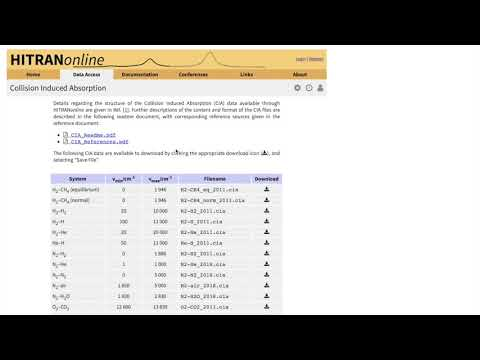

In [15]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('NiKuigtFahk')

### Line-shape (background covered in class):
If we have a line-strength S (in cm$^{-1}$ cm$^2$/molecule) for a specific transition at $\nu_0$, we can compute the cross section as:
$$\sigma(\nu) = S\Phi(\nu-\nu_0)\,,$$
where $\Phi(\nu-\nu_0)$ denotes the line-shape function (in 1/cm$^{-1}$), which is normalized to 1: $\int_{-\infty}^\infty \Phi(\nu-\nu_0) d\nu=1$.

There are several processes that affect the shape and width of $\Phi$ and we will walk through the most important ones here now

##### Doppler Broadening
Doppler broadening is caused by a simple doppler shift of emitted and absorbed frequencies, caused by the relative velocities of the molecules along the line of sight. A doppler shifted apparent frequency from the centroid frequency $\nu_0$ can be described as:
$$\nu = \nu_0\left(1+\frac{v_r}{c}\right)\,$$
where $v_r$ is the relative velocity of the absorbing photon along the line of sight. The doppler shift is then simply
$$ \Delta\nu = \nu_0\frac{v_r}{c}$$

Let us take a simple example with the satellite flying at 7km/s and either staring into the flight direction (technically, it wouldn't see the atmosphere then but let's ignore this) or looking into the back:
____


In [32]:
# Speed of light (in m/s)
c = 299792458.0

# Relative velocity (in m/s)
vr = 7000.0

# Center wavenumber (say 1600nm, which is 1e7/1600=6250 cm$^{-1}$)
vo = 6250.0

# Doppler shift:
delta_nu = vo*vr/c

# Just writing out doppler shift in wavenumbers and wavelengths
print('Doppler shift = {:.3}cm-1'.format(delta_nu))
print('Doppler shift = {:.3}nm'.format(1e7/(vo-delta_nu)-1e7/vo))

Doppler shift = 0.146cm-1
Doppler shift = 0.0374nm


#### Random movements of molecules in gases lead to doppler broadening effects

In the one-dimensional case along say the x-axis (we only observe the distribution along one line of sight), the speed of moleculed is distributed according to the Maxwell-Boltzmann distribution:
$$f(v_x) = \sqrt{\frac{m}{2\pi kT}}\exp{\left(-\frac{mv_x^2}{2kT}\right)}.$$

We can then define a Doppler width $\Delta \nu_D$ as
$$ \Delta \nu_D = \frac{\nu_0}{c}\sqrt{\frac{2kT}{m}}= \frac{\nu_0}{c}\sqrt{\frac{2RT}{M}}\,$$
which yields the following line-shape:
$$\phi_D(\nu) = \frac{1}{\Delta \nu_D \sqrt{\pi}}\exp{\left(-\frac{(\nu-\nu_0)^2}{\Delta \nu^2_D}\right)}=\,,$$
which is a Gaussian distribution.

Let us put in some numbers with R=8.3144598 J/K/mol at 6000cm$^{-1}$:
<li> T = 220K, 290K
<li> M = 16g/mol (CH$4$) or 44g/mol (CO$_2$)
 
---

$ \Delta \nu_D(290K,CO_2)=$ 0.0066cm$^{-1}$

$ \Delta \nu_D(220K,CO_2)=$ 0.0058cm$^{-1}$

$ \Delta \nu_D(290K,CH_4)=$ 0.0110cm$^{-1}$

$ \Delta \nu_D(290K,CH_4)=$ 0.0096cm$^{-1}$

Mulitply with about 1.6585 (2$\sqrt{ln(2)}$) to get FWHM

----
#### Natural and collisional broadening
Due to the Heisenberg principle
$$\Delta E \Delta t \sim h/2\pi\,,$$
As $\Delta E$ is $h\Delta\nu$, we can write:
$$\Delta\nu = \frac{h/2\pi}{\tau}$$

The natural line-width is defined by using the radiative lifetime but mostly negligible as the natural lifetime of the upper state is usually much much smaller than the "perturbed" lifetime in the presence of quencher (e.g. through collisions). Again, there are exceptions.

Collisions between molecules reduce the lifetime of the upper state, thus widening the line width. This behavor gives rise to the so-called Lorentz lineshape.

$$\phi_L(\nu) = \frac{\alpha_L}{\pi \left[(\nu-\nu_0)^2+\alpha_L^2\right]}$$

$\alpha_L$ depends linearly on the number density of the perturbing molecules and the relative speed of the collision partners (thus scales linearly with pressure and with $\sqrt{T}$).

----
#### Voigt lineshape
The Voigt line-shape is the combination of Doppler and Pressure broadening (convolution of the two) but cannot be evaluated analytically. However, there are numerical routines to compute it efficiently.

----
#### other lineshapes
Once you dig deeper, there are various other more complex line-shapes (and line-mixing effects), which we ignore for now as the Voigt line-shape can provide very reasonable results.

In [3]:
## Make sure plots are create inline
%matplotlib inline
## The usual packages (numpy, matplotlib, etc)
from RSE_style import *
figsize(10,8)

In [4]:
# Import the HAPI interface (located file in the same folder!)
from hapi import *
fetch('CO2_sub',2,1,6214.4,6214.8)

HAPI version: 1.1.0.8.7
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2_sub
  65536 bytes written to ./CO2_sub.data
Header written to ./CO2_sub.header
END DOWNLOAD
                     Lines parsed: 5
PROCESSED


In [6]:
describeTable('CO2_sub')

-----------------------------------------
CO2_sub summary:
-----------------------------------------
Comment: 
Contains lines for (12C)(16O)2
 in 6214.400-6214.800 wavenumber range
Number of rows: 5
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_fla

In [7]:
nu_, cs_co2_1atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':1.,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_075atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.75,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_05atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.5,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_025atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.25,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_01atm = absorptionCoefficient_Lorentz(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.1,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_doppler = absorptionCoefficient_Doppler(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.25,'T':293},IntensityThreshold=1e-27)
nu_, cs_co2_Voigt = absorptionCoefficient_Voigt(SourceTables='CO2_sub',WavenumberStep=0.001, WavenumberRange=[6210,6230],Environment={'p':.1,'T':293},IntensityThreshold=1e-27)

Text(0.5, 0, 'Wavenumber (cm$^{-1}$)')

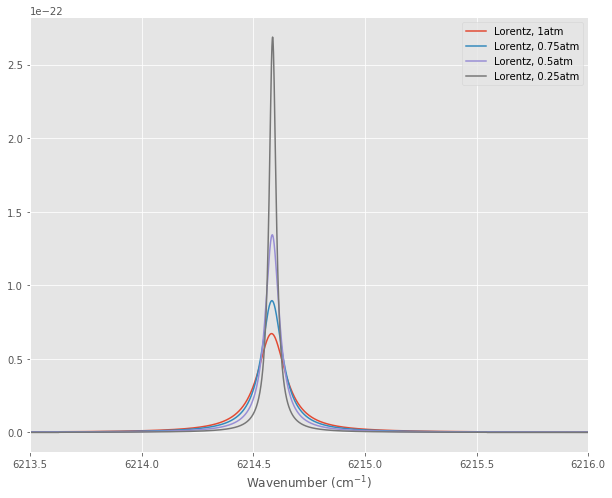

In [8]:
figsize(10,8)
plt.plot(nu_, cs_co2_1atm, label='Lorentz, 1atm')
plt.plot(nu_, cs_co2_075atm,label='Lorentz, 0.75atm')
plt.plot(nu_, cs_co2_05atm,label='Lorentz, 0.5atm')
plt.plot(nu_, cs_co2_025atm,label='Lorentz, 0.25atm')
#plt.plot(nu_, cs_co2_doppler,label='Doppler, 293K')
plt.legend(loc=0)
plt.xlim((6213.5,6216))
plt.xlabel('Wavenumber (cm$^{-1}$)')

Text(0.5, 0, 'Wavenumber (cm$^{-1}$)')

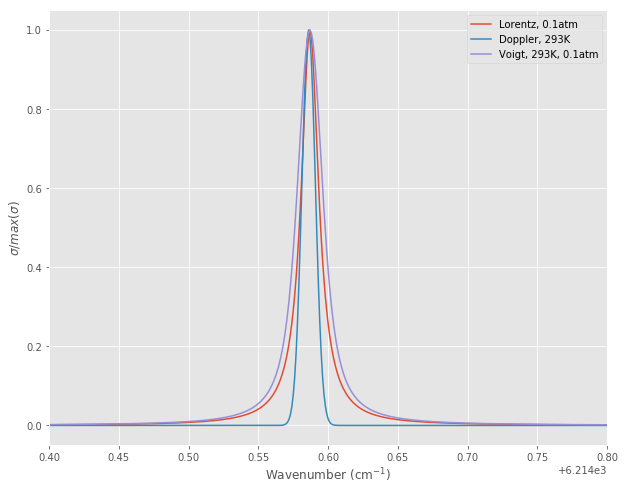

In [9]:
figsize(10,8)
plt.plot(nu_, cs_co2_01atm/np.max(cs_co2_01atm), label='Lorentz, 0.1atm')
plt.plot(nu_, cs_co2_doppler/np.max(cs_co2_doppler),label='Doppler, 293K')
plt.plot(nu_, cs_co2_Voigt/np.max(cs_co2_Voigt),label='Voigt, 293K, 0.1atm')
plt.xlim((6214.4,6214.8))
plt.legend()
plt.ylabel('$\sigma/max(\sigma)$')
plt.xlabel('Wavenumber (cm$^{-1}$)')

Text(0.5, 0, 'Wavenumber (cm$^{-1}$)')

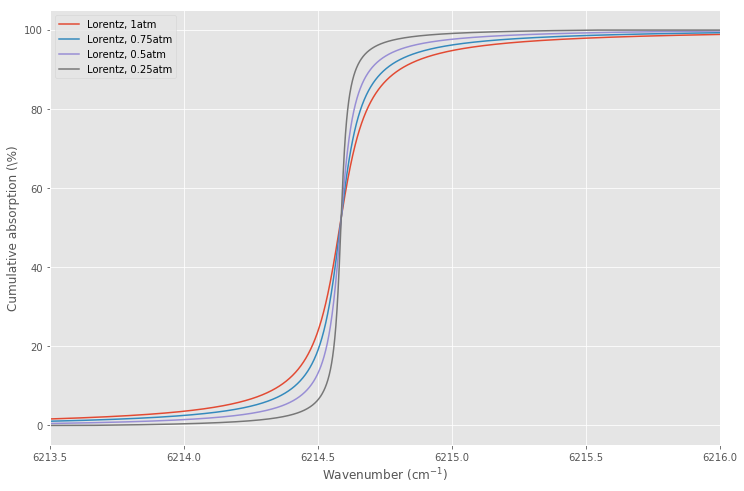

In [10]:
figsize(12,8)
su = np.sum(cs_co2_1atm)
plt.plot(nu_, np.cumsum(cs_co2_1atm)/su*100, label='Lorentz, 1atm')
plt.plot(nu_, np.cumsum(cs_co2_075atm)/su*100,label='Lorentz, 0.75atm')
plt.plot(nu_, np.cumsum(cs_co2_05atm)/su*100,label='Lorentz, 0.5atm')
plt.plot(nu_, np.cumsum(cs_co2_025atm)/su*100,label='Lorentz, 0.25atm')
plt.xlim((6213.5,6216))
plt.legend(loc=0)
plt.ylabel('Cumulative absorption (\%)')
plt.xlabel('Wavenumber (cm$^{-1}$)')

## From an individual line to a band
Here, we will just compute an entire band of CO$_2$ (a few to be precise) and look at some simple behavior, e.g. the re-distribution of individual lines in the P and R branch with changing temperature.

In [11]:
# Import the HAPI interface (located file in the same folder!)
from hapi import *
fetch('CO2',2,1,6000,6400)


Data is fetched from http://hitran.org

BEGIN DOWNLOAD: CO2
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
  65536 bytes written to ./CO2.data
Header written to ./CO2.header
END DOWNLOAD
                     Lines parsed: 8613
PROCESSED


In [12]:
nu_l, cs_co2_Voigt220 = absorptionCoefficient_Voigt(SourceTables='CO2',WavenumberStep=0.001, WavenumberRange=[6000,6400],Environment={'p':1.,'T':220},IntensityThreshold=1e-27)
nu_l, cs_co2_Voigt290 = absorptionCoefficient_Voigt(SourceTables='CO2',WavenumberStep=0.001, WavenumberRange=[6000,6400],Environment={'p':1,'T':290},IntensityThreshold=1e-27)

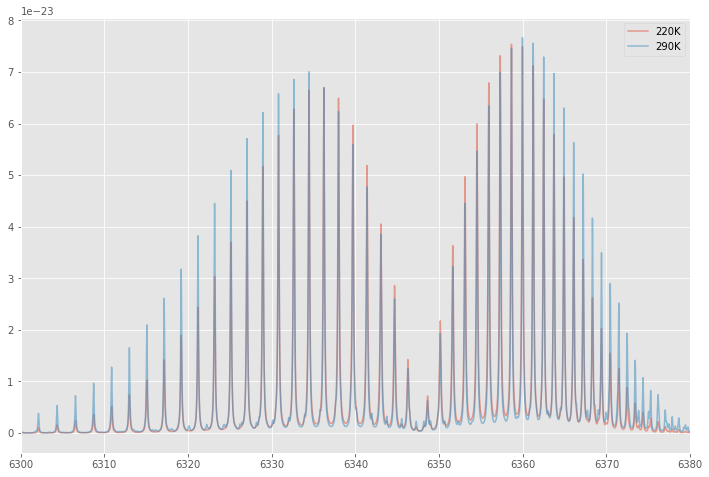

In [13]:
plt.plot(nu_l, cs_co2_Voigt220,alpha=0.5, label='220K')
plt.plot(nu_l, cs_co2_Voigt290,alpha=0.5, label='290K')
plt.xlim((6300,6380))
plt.legend()

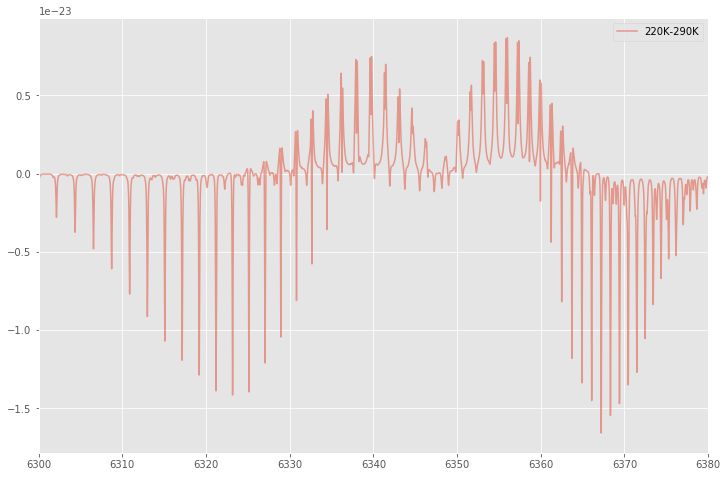

In [14]:
plt.plot(nu_l, cs_co2_Voigt220-cs_co2_Voigt290,alpha=0.5, label='220K-290K')
#plt.plot(nu_l, ,alpha=0.5, label='290K')
plt.xlim((6300,6380))
plt.legend()